In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display settings
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style='whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('/content/marketing_and_product_performance.csv')

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  object 
 1   Product_ID                         10000 non-null  object 
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  object 
 8   Subscription_Tier                  10000 non-null  object 
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  object 
 11  Discount_Level                     10000 non-null  int6

In [3]:
# Preview the first few rows
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,"41,770.45",4946,73,"15,520.09",1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,"29,900.93",570,510,"30,866.17",0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,"22,367.45",3546,265,"32,585.62",1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,"29,957.54",2573,781,"95,740.12",3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,"36,277.19",818,79,"81,990.43",3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [4]:
# Generate basic statistical summary
df.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"25,263.61","2,481.90",498.98,"50,038.63",2.76,18.02,39.42,100.69,275.20,2.50
std,"14,350.09","1,435.97",289.48,"28,545.70",1.30,10.15,17.21,57.07,129.22,1.11
min,500.44,10.00,1.00,"1,002.08",0.50,1.00,10.00,1.00,50.01,1.00
25%,"12,789.19","1,225.75",247.00,"25,264.25",1.63,9.00,24.00,52.00,165.72,2.00
50%,"25,030.17","2,451.00",499.00,"49,513.82",2.75,18.00,39.00,101.00,272.56,2.00
75%,"37,921.73","3,723.00",751.00,"74,507.16",3.89,27.00,54.00,150.00,387.32,3.00
max,"49,999.63","4,999.00",999.00,"99,999.47",5.00,35.00,69.00,199.00,499.97,4.00


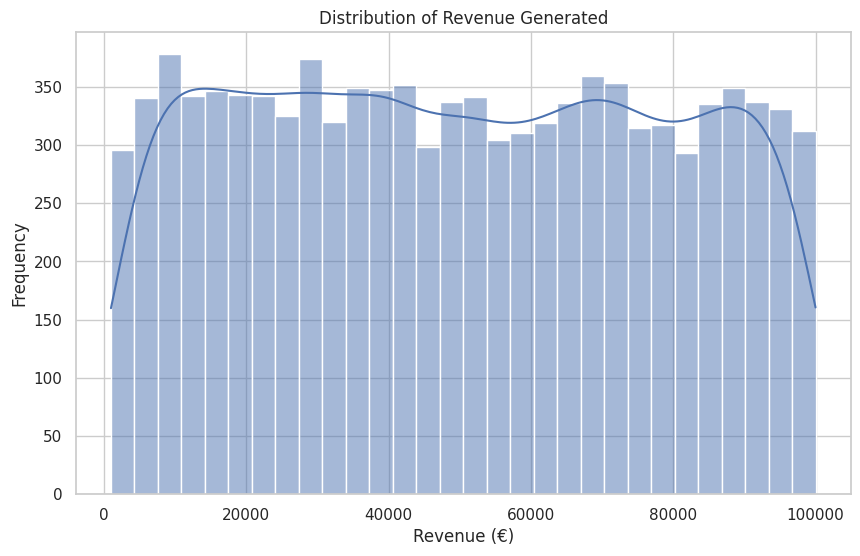

In [5]:
# Histogram of Revenue Generated
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_Generated'], bins=30, kde=True)
plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue (€)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Calculating key marketing KPIs
df['Conversion_Rate'] = df['Conversions'] / df['Clicks']
df['CPA'] = df['Budget'] / df['Conversions']
df['ROAS'] = df['Revenue_Generated'] / df['Budget']
df['Revenue_per_Unit'] = df['Revenue_Generated'] / df['Units_Sold']

# Preview new columns
df[['Conversion_Rate', 'CPA', 'ROAS', 'Revenue_per_Unit']].describe()

,Conversion_Rate,CPA,ROAS,Revenue_per_Unit
count,"10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.61,188.64,4.67,"1,398.18"
std,2.32,"1,099.36",10.11,"4,631.01"
min,0.00,0.57,0.02,5.50
25%,0.10,25.52,0.99,251.59
50%,0.20,50.54,1.97,498.49
75%,0.40,102.63,3.94,962.41
max,64.93,"48,805.15",184.44,"96,643.07"


In [7]:
selected_columns = [
    'Campaign_ID',
    'Budget',
    'Clicks',
    'Conversions',
    'Revenue_Generated',
    'ROI',
    'Subscription_Tier',
    'Subscription_Length',
    'Discount_Level',
    'Units_Sold',
    'Customer_Satisfaction_Post_Refund',
    'Common_Keywords',
    'Conversion_Rate',
    'CPA',
    'ROAS',
    'Revenue_per_Unit'
]

df_kpi = df[selected_columns]

In [8]:
# Export the selected data to CSV
df_kpi.to_csv('marketing_kpis.csv', index=False)

In [9]:
from google.colab import files
files.download('marketing_kpis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

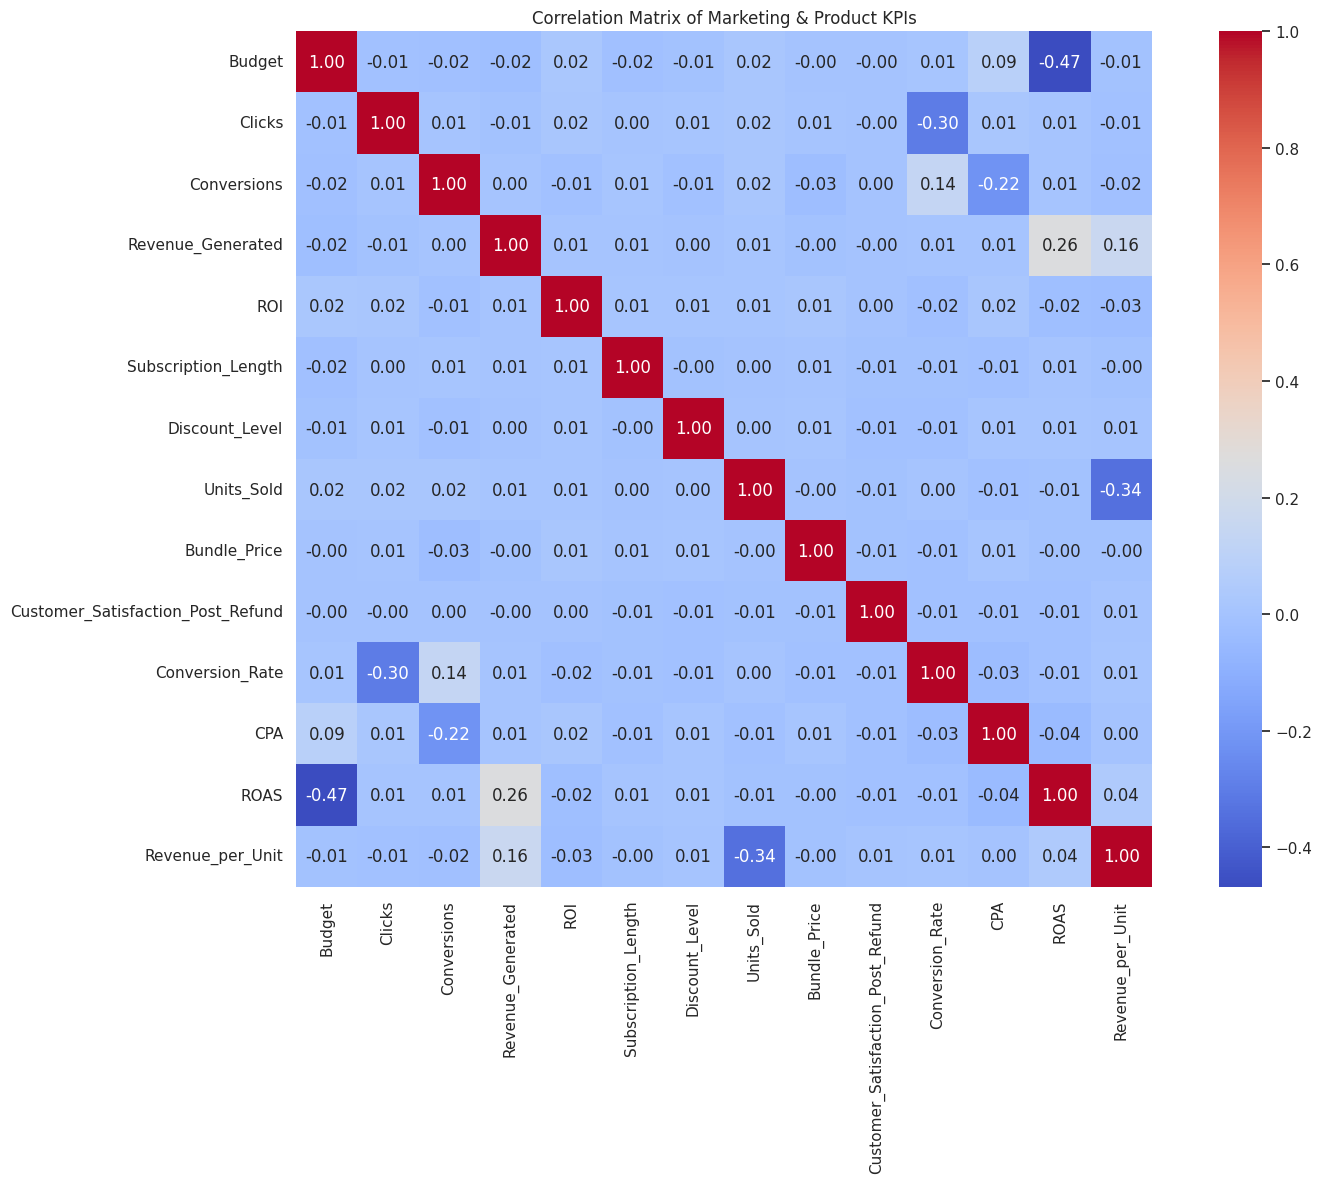

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns relevant to KPIs
kpi_columns = [
    'Budget', 'Clicks', 'Conversions', 'Revenue_Generated', 'ROI',
    'Subscription_Length', 'Discount_Level', 'Units_Sold', 'Bundle_Price',
    'Customer_Satisfaction_Post_Refund', 'Conversion_Rate', 'CPA', 'ROAS', 'Revenue_per_Unit'
]

# Compute correlation matrix
correlation_matrix = df[kpi_columns].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Marketing & Product KPIs')
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# Create an extended DataFrame with all relevant columns
selected_columns_extended = [
    'Campaign_ID',
    'Budget',
    'Clicks',
    'Conversions',
    'Revenue_Generated',
    'ROI',
    'Subscription_Tier',
    'Subscription_Length',
    'Discount_Level',
    'Units_Sold',
    'Bundle_Price',
    'Customer_Satisfaction_Post_Refund',
    'Common_Keywords',
    'Conversion_Rate',
    'CPA',
    'ROAS',
    'Revenue_per_Unit'
]

df_extended = df[selected_columns_extended]

In [14]:
# Save to new CSV file
df_extended.to_csv('marketing_kpis_extended.csv', index=False)

In [15]:
from google.colab import files
files.download('marketing_kpis_extended.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

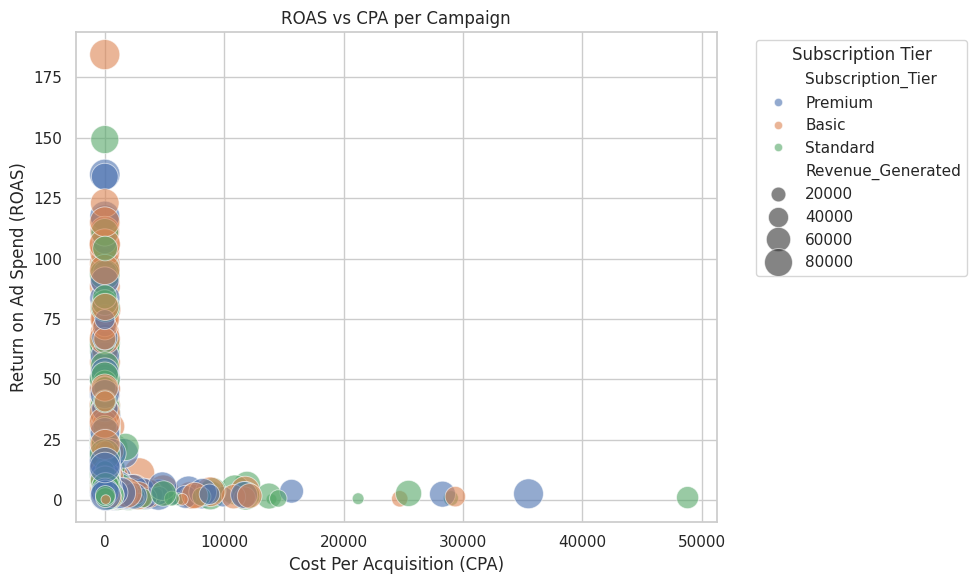

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CPA', y='ROAS', size='Revenue_Generated', hue='Subscription_Tier', alpha=0.6, sizes=(20, 500))
plt.title('ROAS vs CPA per Campaign')
plt.xlabel('Cost Per Acquisition (CPA)')
plt.ylabel('Return on Ad Spend (ROAS)')
plt.legend(title='Subscription Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-1181957005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Satisfaction_Post_Refund', y='ROAS', palette='Set2')


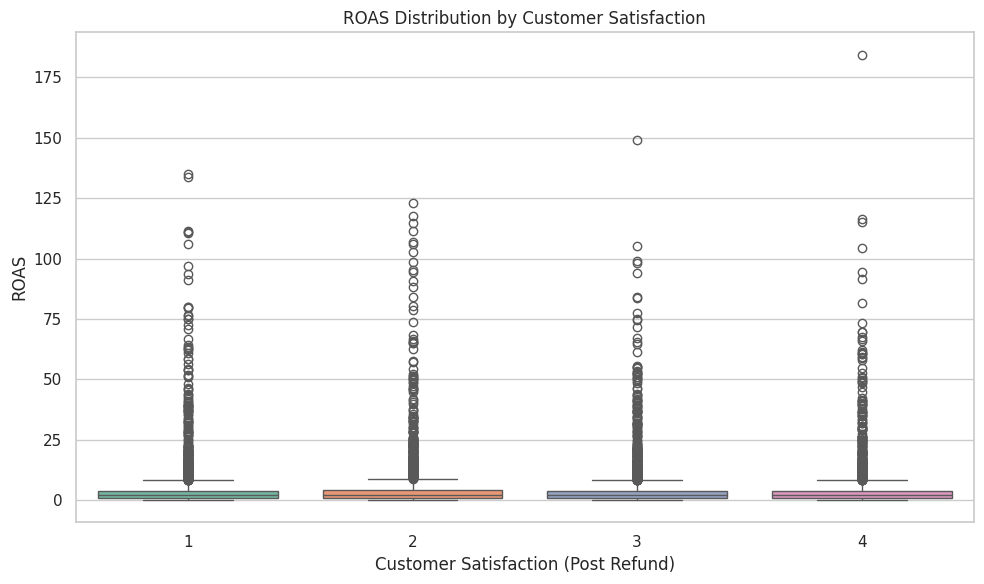

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer_Satisfaction_Post_Refund', y='ROAS', palette='Set2')
plt.title('ROAS Distribution by Customer Satisfaction')
plt.xlabel('Customer Satisfaction (Post Refund)')
plt.ylabel('ROAS')
plt.tight_layout()
plt.show()

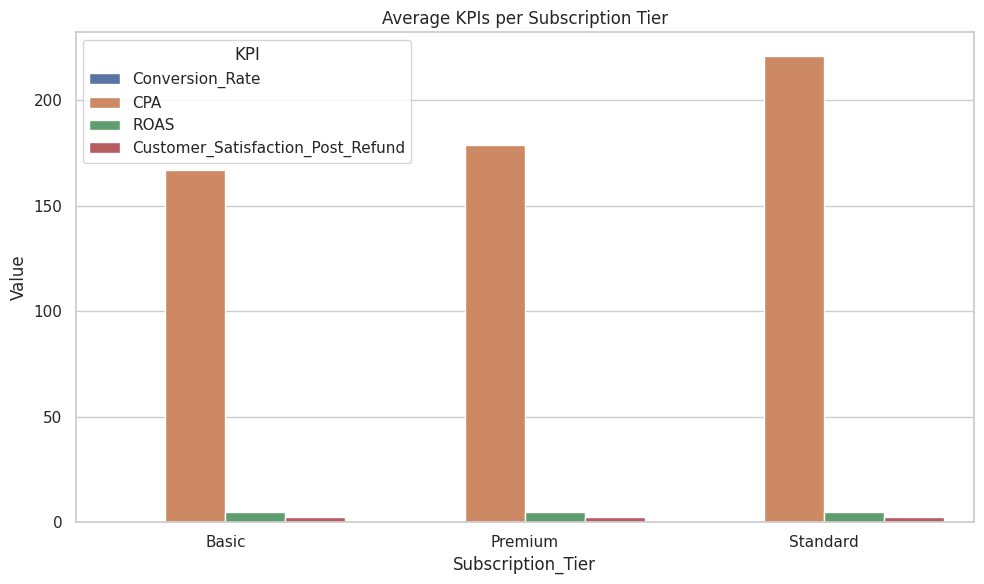

In [18]:
tier_summary = df.groupby('Subscription_Tier').agg({
    'Conversion_Rate': 'mean',
    'CPA': 'mean',
    'ROAS': 'mean',
    'Customer_Satisfaction_Post_Refund': 'mean'
}).round(2).reset_index()

tier_summary_melted = tier_summary.melt(id_vars='Subscription_Tier', var_name='KPI', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=tier_summary_melted, x='Subscription_Tier', y='Value', hue='KPI')
plt.title('Average KPIs per Subscription Tier')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

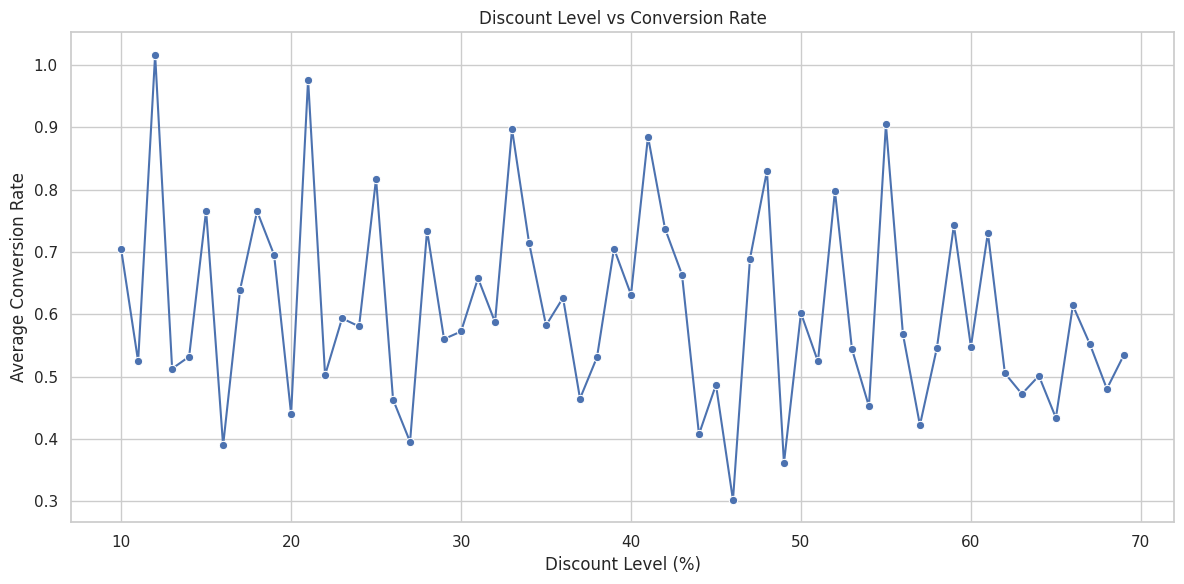

In [19]:
discount_summary = df.groupby('Discount_Level')['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_summary, x='Discount_Level', y='Conversion_Rate', marker='o')
plt.title('Discount Level vs Conversion Rate')
plt.xlabel('Discount Level (%)')
plt.ylabel('Average Conversion Rate')
plt.tight_layout()
plt.show()

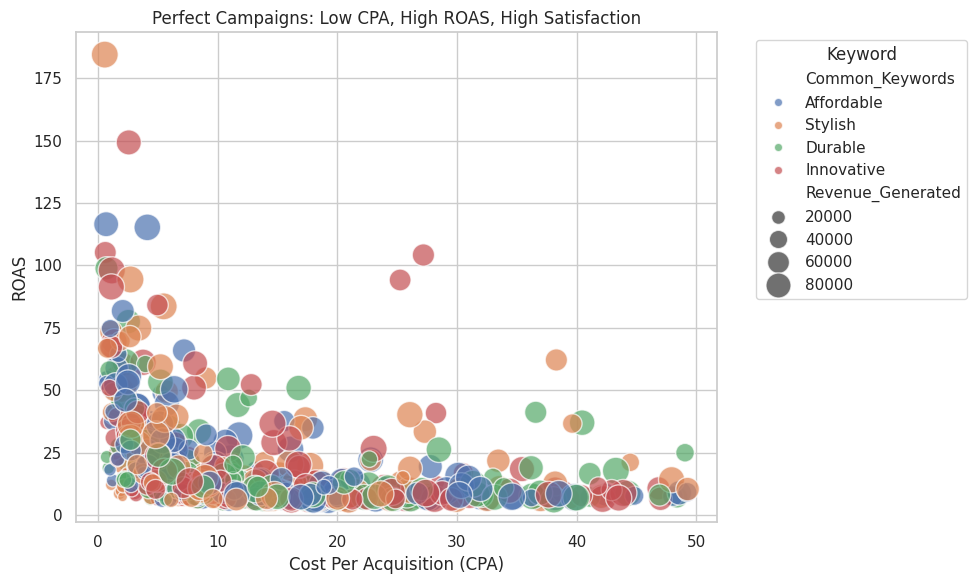

In [20]:
perfect_campaigns = df[
    (df['CPA'] < 50) &
    (df['ROAS'] > 6) &
    (df['Customer_Satisfaction_Post_Refund'] > 2.5)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=perfect_campaigns, x='CPA', y='ROAS', size='Revenue_Generated', hue='Common_Keywords', alpha=0.7, sizes=(50, 400))
plt.title('Perfect Campaigns: Low CPA, High ROAS, High Satisfaction')
plt.xlabel('Cost Per Acquisition (CPA)')
plt.ylabel('ROAS')
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()